--- Exploratory Data Analysis (EDA) ---

## 1. Visión General del Dataset

### 1.1 df.head(): Primeras filas del DataFrame
  ResinType  ResinPercentage    ResinSupplier       PigmentType  \
0     Epoxy            46.64  SupplierE_Resin  Titanium Dioxide   
1   Acrylic            45.91  SupplierB_Resin      Organic Blue   
2   Acrylic            51.23  SupplierA_Resin      Organic Blue   
3     Alkyd            49.91  SupplierC_Resin  Titanium Dioxide   
4     Alkyd            49.34  SupplierD_Resin  Titanium Dioxide   

   PigmentPercentage    PigmentSupplier      SolventType  SolventPercentage  \
0              25.15  SupplierG_Pigment  Mineral Spirits              25.00   
1              31.29  SupplierK_Pigment           Xylene              20.75   
2              35.22  SupplierL_Pigment           Xylene              11.88   
3              32.39  SupplierG_Pigment  Mineral Spirits              11.84   
4              27.32  SupplierH_Pigment            Water              20.55   


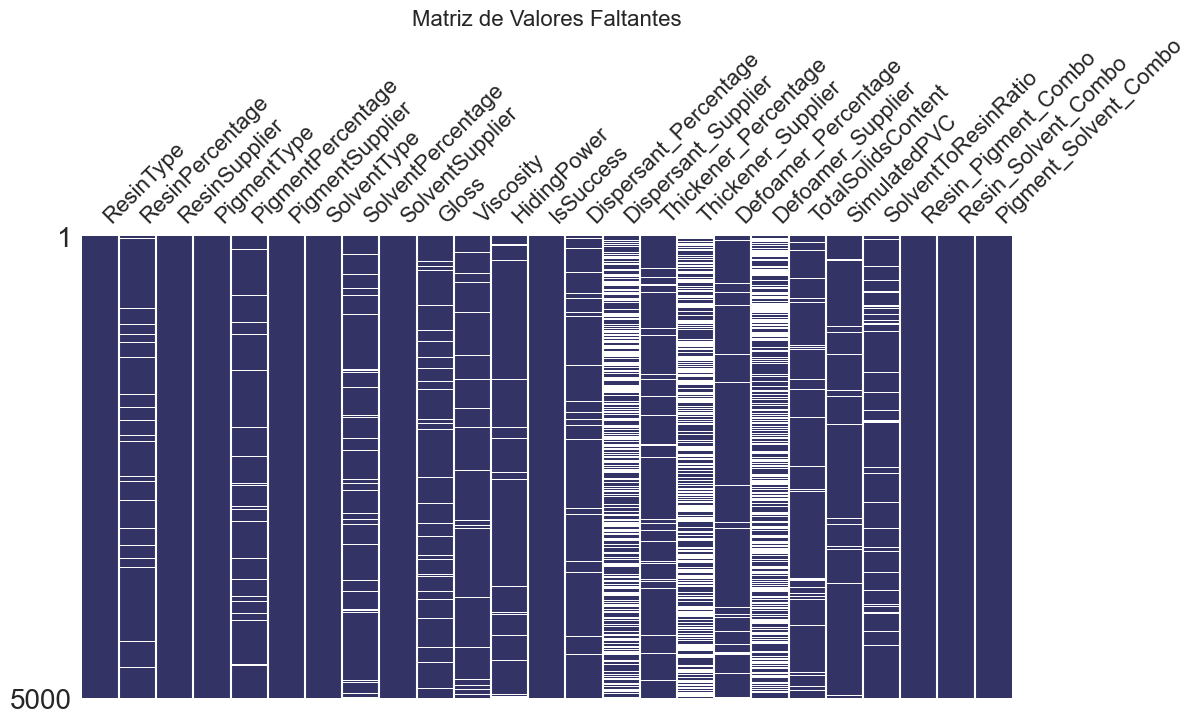


**Análisis:** `msno.matrix()` visualiza los valores faltantes como líneas blancas dentro de un gráfico oscuro. Permite identificar:
- **Columnas con NaNs:** Cualquier columna con líneas blancas tiene datos faltantes.
- **Patrones de Faltantes:** Si las líneas blancas se alinean en varias columnas para las mismas filas, sugiere que los datos faltan juntos, lo que podría indicar un problema de registro sistemático.
**Implicación Estadística:** Los patrones de NaNs pueden influir en la elección de la estrategia de imputación. Por ejemplo, si los NaNs son 'Missing Completely At Random' (MCAR), la imputación simple es más robusta. Si son 'Missing Not At Random' (MNAR), una imputación más sofisticada o el uso de modelos que manejen NaNs directamente podría ser necesario.



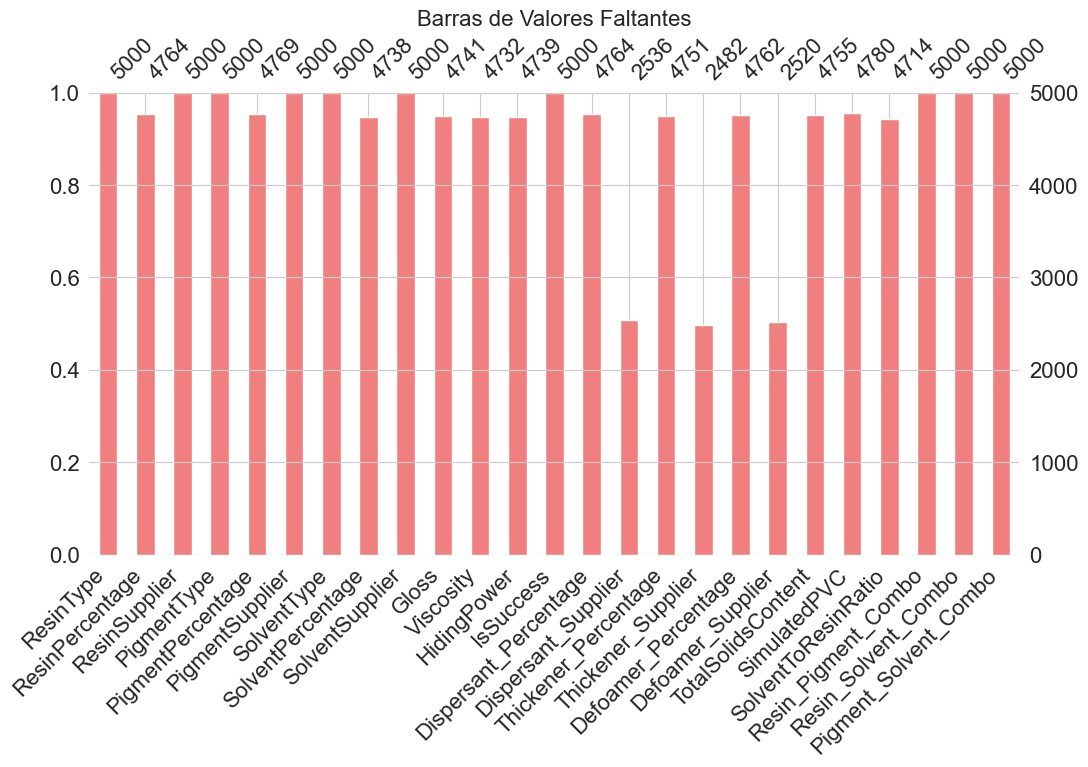


**Análisis:** `msno.bar()` muestra una barra para cada columna, donde la altura indica la proporción de datos no nulos. Es una forma rápida de ver qué columnas tienen la mayor cantidad de NaNs.
**Implicación Estadística:** Visualmente confirma los porcentajes de NaNs. Columnas con un porcentaje muy alto de NaNs (ej., >50-70%) podrían ser candidatas para ser eliminadas en lugar de imputadas, a menos que se tenga un fuerte conocimiento de dominio que justifique su retención.


## 4. Análisis de Desbalance de Clases ('IsSuccess')

### 4.1 Conteo y Porcentaje de Clases en 'IsSuccess':
IsSuccess
0    4035
1     965
Name: count, dtype: int64
IsSuccess
0    80.7
1    19.3
Name: proportion, dtype: float64

**Análisis:** Muestra cuántas instancias de cada clase (0: Falla, 1: Éxito) existen y su proporción. Como intencionalmente creamos un desbalance, verás una diferencia significativa.
**Implicación Estadística:** Los datasets desbalanceados pueden llevar a modelos de clasificación que son bue

C:\Users\Víctor\AppData\Local\Temp\ipykernel_16996\2451119475.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsSuccess', data=df, palette='viridis')


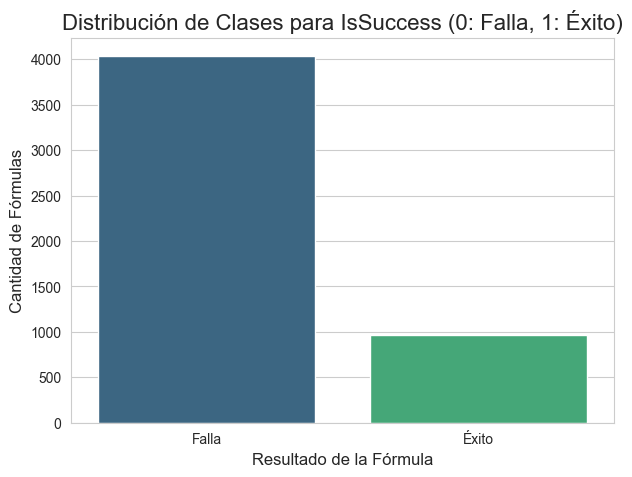


**Análisis:** Un `countplot` es una representación gráfica de la `value_counts()`. Confirma visualmente la disparidad en el número de muestras entre las clases. La barra de 'Falla' será notablemente más alta.
**Implicación Estadística:** La visualización refuerza la necesidad de técnicas de balanceo de datos para evitar que el modelo ignore la clase minoritaria.


## 5. Análisis de Variables Categóricas (Tipos y Proveedores)

### 5.x Conteo de valores para la columna: ResinType
ResinType
Acrylic    1694
Alkyd      1674
Epoxy      1632
Name: count, dtype: int64

**Análisis:** Para cada columna categórica, `value_counts()` muestra la frecuencia de cada categoría única. Esto es útil para:
- **Identificar Variabilidad:** ¿Cuántos tipos de resina/pigmento/solvente/aditivo hay?
- **Identificar Dominancia:** ¿Hay un proveedor o un tipo que se usa mucho más que otros?
- **Errores de Entrada:** Detectar posibles errores tipográficos si hay categorías muy similares (ej., 'Acrylic' y 'Acrilyc').

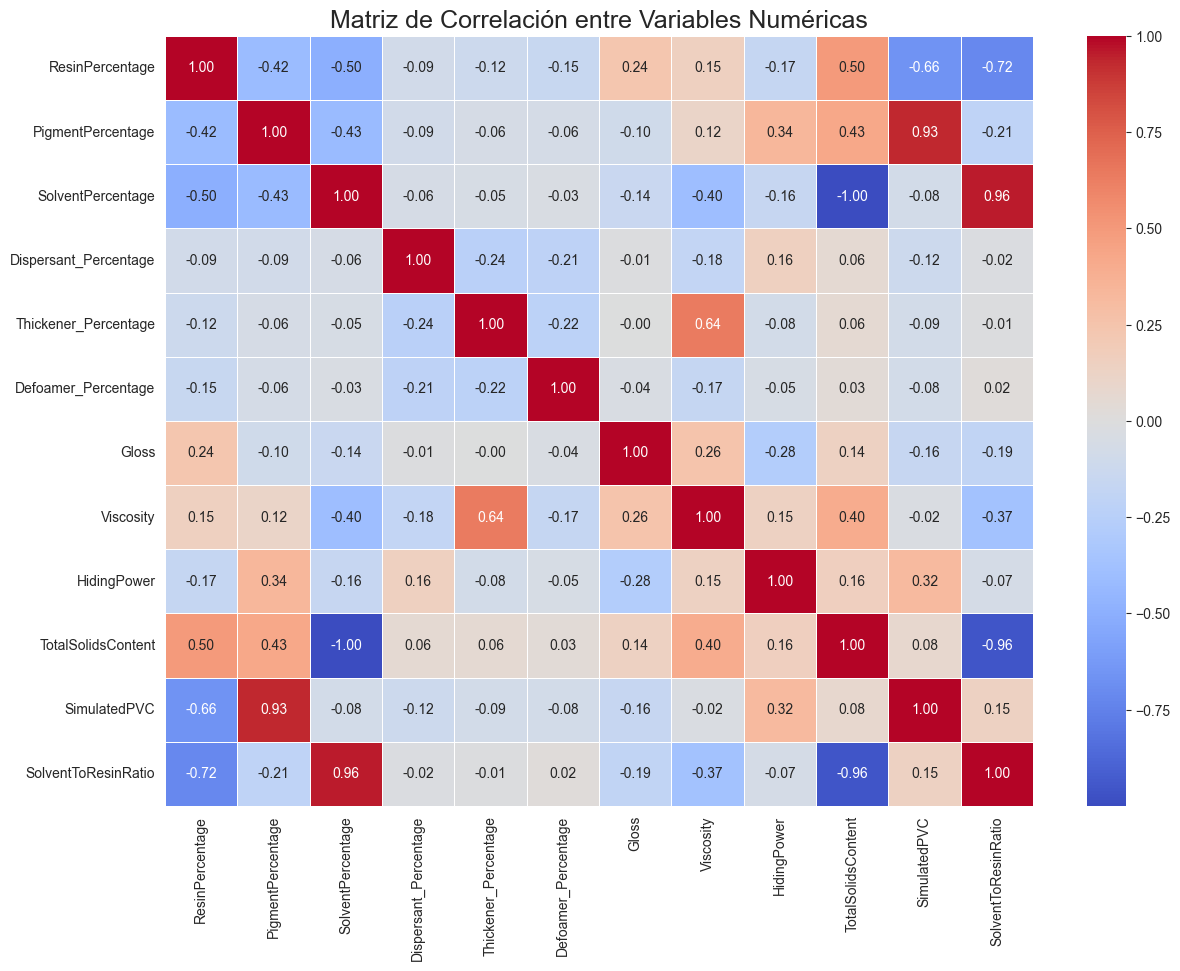


**Análisis:** La matriz de correlación muestra el coeficiente de correlación de Pearson entre cada par de variables numéricas. Varía de -1 a 1:
- **1:** Correlación positiva perfecta (cuando una aumenta, la otra también).
- **-1:** Correlación negativa perfecta (cuando una aumenta, la otra disminuye).
- **0:** No hay correlación lineal.
- **`annot=True`:** Muestra los valores numéricos de la correlación en el mapa de calor.
- **`cmap='coolwarm'`:** Define el esquema de colores para visualizar la fuerza y dirección de la correlación.
**Implicación Estadística:** Las correlaciones altas (positivas o negativas) pueden indicar una relación lineal fuerte. Esto es útil para:
- **Identificar Predictores Potenciales:** Columnas con alta correlación con tus propiedades objetivo (`Gloss`, `Viscosity`, `HidingPower`).
- **Detectar Multicolinealidad:** Si dos variables predictoras están altamente correlacionadas entre sí (ej., >0.8 o <-0.8), podrían estar midiendo lo mismo. Esto puede causar prob

C:\Users\Víctor\AppData\Local\Temp\ipykernel_16996\2451119475.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsSuccess', y='Gloss', data=df, palette='pastel')
C:\Users\Víctor\AppData\Local\Temp\ipykernel_16996\2451119475.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsSuccess', y='Viscosity', data=df, palette='pastel')
C:\Users\Víctor\AppData\Local\Temp\ipykernel_16996\2451119475.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsSuccess', y='HidingPower', data=df, palette='pastel')


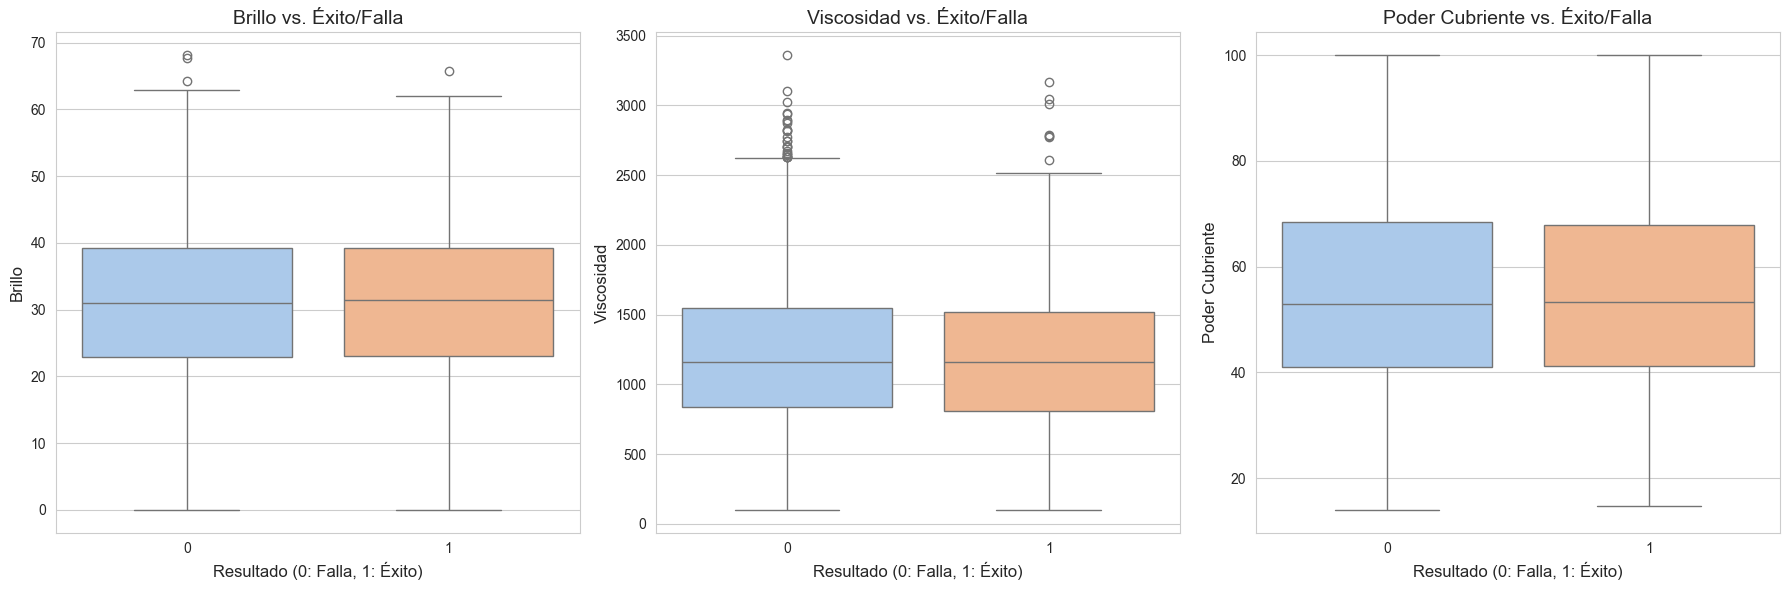


**Análisis:** Los boxplots (diagramas de caja y bigotes) muestran la distribución de una variable numérica para diferentes categorías de una variable cualitativa.
- **Caja:** Representa el rango intercuartílico (IQR), del 25% al 75% de los datos.
- **Línea Central:** La mediana (50% de los datos).
- **Bigotes:** Extienden hasta 1.5 veces el IQR desde los cuartiles, mostrando la dispersión de la mayoría de los datos.
- **Puntos:** Valores atípicos (outliers) fuera de los bigotes.
**Implicación Estadística:** Si las cajas de 'Éxito' y 'Falla' son significativamente diferentes (no se superponen mucho), significa que esas propiedades son buenos discriminadores para predecir si una fórmula será un éxito o una falla. Esto valida los criterios que usaste en tu simulación para `IsSuccess`.
**Interpretación para un Formulador:** Esto te muestra si las propiedades clave caen dentro de los rangos de especificación esperados para una fórmula exitosa, o si las fallas tienen características muy dis

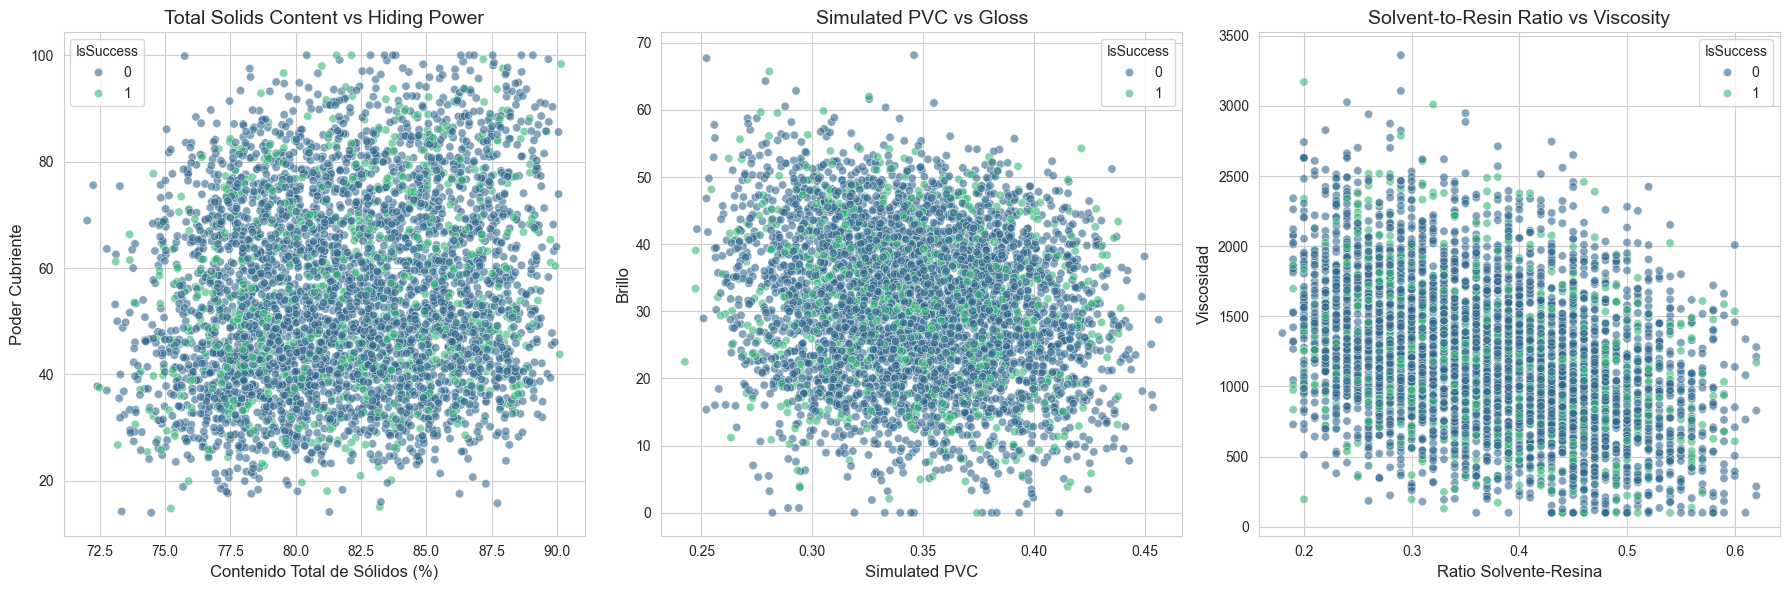


**Análisis:** Los scatter plots (diagramas de dispersión) muestran la relación entre dos variables numéricas. Cada punto es una observación. `hue='IsSuccess'` colorea los puntos según el resultado de éxito/falla, permitiendo ver si la relación varía por clase.
**Implicación Estadística:** Buscamos patrones: si los puntos forman una línea (correlación lineal), una curva (relación no lineal), o si se agrupan de manera diferente para 'Éxito' vs. 'Falla'. Por ejemplo, para `SimulatedPVC` vs `Gloss`, esperas ver una caída de brillo una vez que el PVC supera un cierto valor (el CPVC simulado), y el `hue` te ayudará a ver dónde caen los éxitos y las fallas en esa curva.
**Interpretación para un Formulador:** Valida tus hipótesis sobre cómo estas nuevas características teóricas se manifiestan en las propiedades finales. ¿El CPVC simulado realmente causa una caída del brillo para las fórmulas fallidas? ¿Las fórmulas exitosas tienden a tener un `SolventToResinRatio` óptimo para la viscosidad de

C:\Users\Víctor\AppData\Local\Temp\ipykernel_16996\2451119475.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resin_Pigment_Combo', y='Gloss', data=df, palette='tab10')


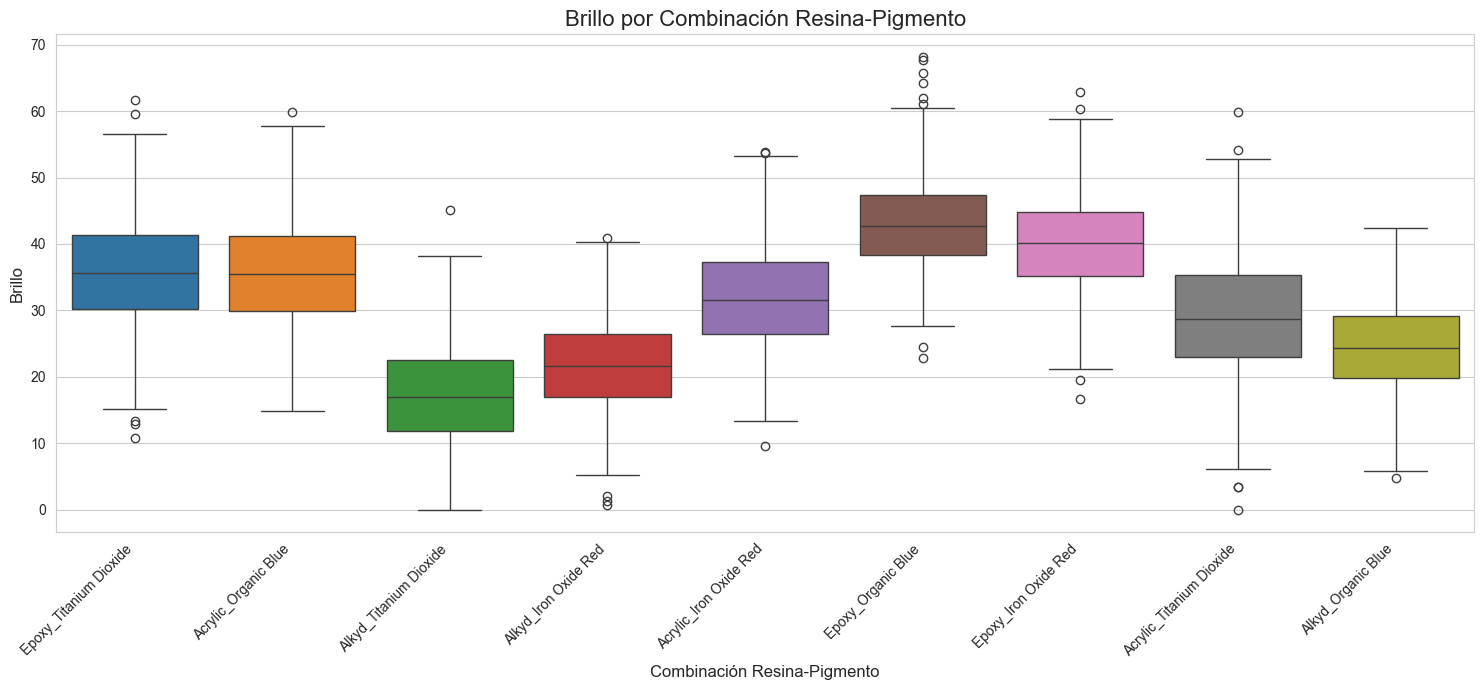


**Análisis:** Este boxplot muestra la distribución del Brillo para cada combinación única de Resina y Pigmento. Es una forma visual de detectar interacciones.
**Implicación Estadística:** Si las distribuciones de brillo varían significativamente entre diferentes combinaciones, esto significa que la combinación de `ResinType` y `PigmentType` es una característica predictiva valiosa por sí misma, que el modelo puede aprender. Esto captura la sinergia o la incompatibilidad.
**Interpretación para un Formulador:** Permite identificar rápidamente qué combinaciones de materiales son inherentemente más propicias para un alto brillo o un bajo brillo, guiando futuras decisiones de formulación.


--- EDA Completo ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Necesario para visualización de NaNs

# Configuración para mejorar la visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Carga el dataset (asegúrate de que el nombre del archivo sea correcto)
df = pd.read_csv('simulated_paint_formulas_with_engineered_features.csv')

print("--- Exploratory Data Analysis (EDA) ---")

#### 1. Visión General del Dataset

print("\n## 1. Visión General del Dataset")

# 1.1 df.head()
print("\n### 1.1 df.head(): Primeras filas del DataFrame")
print(df.head())
print("\n**Análisis:** Este método muestra las primeras 5 filas del DataFrame. Es la primera 'mirada' a tus datos, permitiendo:\n- **Verificación de Carga:** Asegurarte de que el archivo se cargó correctamente.\n- **Inspección de Formato:** Confirmar que las columnas son las esperadas y que los datos parecen estar en el formato correcto (ej., números como números, texto como texto).\n- **Presencia de Nuevas Features:** Verificar que las características de ingeniería que agregamos (TotalSolidsContent, SimulatedPVC, etc.) están presentes.\n")

# 1.2 df.info()
print("\n### 1.2 df.info(): Información resumida del DataFrame")
df.info()
print("\n**Análisis:** Proporciona un resumen conciso del DataFrame, lo cual es invaluable:\n- **Número de Entradas (Rows) y Columnas:** Te dice el tamaño total de tu dataset.\n- **Conteo de No-Nulos (`Non-Null Count`):** ¡Este es CRÍTICO para identificar datos faltantes! Si este número es menor que el `Total Entries` para una columna, significa que hay valores nulos (`NaN`).\n- **Tipo de Dato (`Dtype`):** Muestra si Pandas interpretó correctamente los tipos de datos (ej., `float64` para números decimales, `int64` para enteros, `object` para texto/strings). Es importante que los números sean numéricos para operaciones matemáticas.\n- **Uso de Memoria:** Información útil para datasets muy grandes.\n**Interpretación para un Formulador:** Te dirá rápidamente si tienes datos completos para todas las pruebas o si hay lagunas en tus registros de laboratorio.\n")


#### 2. Resumen Estadístico de Columnas Numéricas

print("\n## 2. Resumen Estadístico de Columnas Numéricas")

# 2.1 df.describe()
print("\n### 2.1 df.describe(): Estadísticas descriptivas de columnas numéricas")
print(df.describe())
print("\n**Análisis:** Este método calcula estadísticas clave para todas las columnas numéricas:\n- **`count`:** Número de valores no nulos. Confirma la presencia de NaNs (si es menor que el total de filas).\n- **`mean` (Media):** El promedio de los valores. Indice de tendencia central. Para un formulador, la media de brillo o viscosidad indica el rendimiento típico.\n- **`std` (Desviación Estándar):** Medida de la dispersión o variabilidad de los datos. Una `std` alta indica que los datos están muy dispersos alrededor de la media. Un formulador querría una baja `std` en el proceso de producción.\n- **`min` y `max`:** Los valores mínimo y máximo. Permite verificar si los datos están dentro de rangos esperados y detectar posibles outliers extremos.\n- **Cuartiles (25%, 50% -mediana-, 75%):** Indican la distribución de los datos. La mediana (50%) es menos sensible a outliers que la media. La diferencia entre el 75% y el 25% es el Rango Intercuartílico (IQR), otra medida de dispersión.\n**Interpretación para un Formulador:** Te da una 'ficha técnica' rápida de tus propiedades y porcentajes, ayudándote a entender si las fórmulas están en el rango deseado o si hay mucha variabilidad.\n")

#### 3. Análisis de Datos Faltantes (¡CRÍTICO!)

print("\n## 3. Análisis de Datos Faltantes")

# 3.1 Conteo y Porcentaje de NaNs
print("\n### 3.1 Conteo y Porcentaje de Valores Faltantes:")
print("Conteo absoluto de NaNs por columna:")
print(df.isnull().sum())
print("\nPorcentaje de NaNs por columna:")
print((df.isnull().sum() / len(df)) * 100)
print("\n**Análisis:** `isnull().sum()` cuenta el número de valores nulos (NaN) en cada columna. Dividir por `len(df)` y multiplicar por 100 da el porcentaje. Esto te dice *dónde* y *cuánto* faltan datos.\n**Implicación Estadística:** Los NaNs deben ser manejados (imputación o eliminación) antes de alimentar los datos a la mayoría de los modelos de ML, ya que no pueden procesar valores nulos. La elección de la estrategia de imputación dependerá del porcentaje y del tipo de dato.\n**Interpretación para un Formulador:** Identifica qué mediciones o registros se pierden con más frecuencia. ¿Hay un problema en el laboratorio con ciertos equipos o ensayos?\n")

# 3.2 Visualización de NaNs con `missingno`
print("\n### 3.2 Visualización de Valores Faltantes (usando `missingno`):")
# Matriz de valores faltantes: visualiza patrones
msno.matrix(df, figsize=(12, 6), sparkline=False, color=(0.2, 0.2, 0.4))
plt.title('Matriz de Valores Faltantes', fontsize=16)
plt.show()
print("\n**Análisis:** `msno.matrix()` visualiza los valores faltantes como líneas blancas dentro de un gráfico oscuro. Permite identificar:\n- **Columnas con NaNs:** Cualquier columna con líneas blancas tiene datos faltantes.\n- **Patrones de Faltantes:** Si las líneas blancas se alinean en varias columnas para las mismas filas, sugiere que los datos faltan juntos, lo que podría indicar un problema de registro sistemático.\n**Implicación Estadística:** Los patrones de NaNs pueden influir en la elección de la estrategia de imputación. Por ejemplo, si los NaNs son 'Missing Completely At Random' (MCAR), la imputación simple es más robusta. Si son 'Missing Not At Random' (MNAR), una imputación más sofisticada o el uso de modelos que manejen NaNs directamente podría ser necesario.\n")

# Barras de valores faltantes: resumen gráfico
msno.bar(df, figsize=(12, 6), color='lightcoral')
plt.title('Barras de Valores Faltantes', fontsize=16)
plt.show()
print("\n**Análisis:** `msno.bar()` muestra una barra para cada columna, donde la altura indica la proporción de datos no nulos. Es una forma rápida de ver qué columnas tienen la mayor cantidad de NaNs.\n**Implicación Estadística:** Visualmente confirma los porcentajes de NaNs. Columnas con un porcentaje muy alto de NaNs (ej., >50-70%) podrían ser candidatas para ser eliminadas en lugar de imputadas, a menos que se tenga un fuerte conocimiento de dominio que justifique su retención.\n")


#### 4. Análisis de Desbalance de Clases (para 'IsSuccess')

print("\n## 4. Análisis de Desbalance de Clases ('IsSuccess')")

# 4.1 Conteo y Porcentaje
print("\n### 4.1 Conteo y Porcentaje de Clases en 'IsSuccess':")
print(df['IsSuccess'].value_counts())
print(df['IsSuccess'].value_counts(normalize=True) * 100)
print("\n**Análisis:** Muestra cuántas instancias de cada clase (0: Falla, 1: Éxito) existen y su proporción. Como intencionalmente creamos un desbalance, verás una diferencia significativa.\n**Implicación Estadística:** Los datasets desbalanceados pueden llevar a modelos de clasificación que son buenos prediciendo la clase mayoritaria, pero muy pobres para la clase minoritaria (la que a menudo es de mayor interés, ej., detectar fraudes o, en tu caso, identificar un éxito poco común). Métricas como la precisión (accuracy) son engañosas aquí. Se deben usar métricas como Precision, Recall, F1-Score, o AUC-ROC. Se necesitarán técnicas de balanceo (sobremuestreo, submuestreo) en el preprocesamiento.\n**Interpretación para un Formulador:** Refleja la realidad. Las fórmulas exitosas son a menudo más difíciles de conseguir y menos comunes que las fallidas. El objetivo es que el modelo identifique esos *éxitos* raros.\n")

# 4.2 Visualización de Distribución de Clases
plt.figure(figsize=(7, 5))
sns.countplot(x='IsSuccess', data=df, palette='viridis')
plt.title('Distribución de Clases para IsSuccess (0: Falla, 1: Éxito)', fontsize=16)
plt.xlabel('Resultado de la Fórmula', fontsize=12)
plt.ylabel('Cantidad de Fórmulas', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Falla', 'Éxito'], fontsize=10)
plt.show()
print("\n**Análisis:** Un `countplot` es una representación gráfica de la `value_counts()`. Confirma visualmente la disparidad en el número de muestras entre las clases. La barra de 'Falla' será notablemente más alta.\n**Implicación Estadística:** La visualización refuerza la necesidad de técnicas de balanceo de datos para evitar que el modelo ignore la clase minoritaria.\n")


#### 5. Análisis de Variables Categóricas (Tipos y Proveedores)

print("\n## 5. Análisis de Variables Categóricas (Tipos y Proveedores)")

categorical_cols = [col for col in df.columns if 'Type' in col or 'Supplier' in col or 'Combo' in col]

for col in categorical_cols:
    print(f"\n### 5.x Conteo de valores para la columna: {col}")
    print(df[col].value_counts())
    print(f"\n**Análisis:** Para cada columna categórica, `value_counts()` muestra la frecuencia de cada categoría única. Esto es útil para:\n- **Identificar Variabilidad:** ¿Cuántos tipos de resina/pigmento/solvente/aditivo hay?\n- **Identificar Dominancia:** ¿Hay un proveedor o un tipo que se usa mucho más que otros?\n- **Errores de Entrada:** Detectar posibles errores tipográficos si hay categorías muy similares (ej., 'Acrylic' y 'Acrilyc').\n**Implicación Estadística:** Las variables categóricas necesitan ser convertidas a formato numérico (codificación) para la mayoría de los modelos de ML. El tipo de codificación (One-Hot Encoding, Label Encoding, Target Encoding) dependerá del número de categorías y de si hay un orden inherente.\n**Interpretación para un Formulador:** Muestra la diversidad de los materiales que se están probando y la distribución del uso de proveedores. ¿Hay un proveedor con el que se experimente poco?\n")
    
    # Opcional: visualizar las distribuciones (descomentar para ejecutar)
    # plt.figure(figsize=(10, 6))
    # sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')
    # plt.title(f'Distribución de {col}', fontsize=16)
    # plt.xlabel('Cantidad', fontsize=12)
    # plt.ylabel(col, fontsize=12)
    # plt.show()


#### 6. Relaciones entre Variables (Correlaciones y Gráficos Bivariados)

print("\n## 6. Relaciones entre Variables")

# 6.1 Matriz de Correlación de Columnas Numéricas
print("\n### 6.1 Matriz de Correlación de Columnas Numéricas:")
# Selecciona solo las columnas numéricas relevantes para la correlación.
# Excluye 'IsSuccess' de la correlación si se considera como objetivo binario para clasificacion
# o si quieres analizarlo por separado.
# Se excluyen los NaNs automáticamente por `corr()`, por lo que el conteo puede variar.
numeric_cols_for_corr = [
    'ResinPercentage', 'PigmentPercentage', 'SolventPercentage',
    'Dispersant_Percentage', 'Thickener_Percentage', 'Defoamer_Percentage',
    'Gloss', 'Viscosity', 'HidingPower',
    'TotalSolidsContent', 'SimulatedPVC', 'SolventToResinRatio'
]
correlation_matrix = df[numeric_cols_for_corr].corr()
print(correlation_matrix)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.show()
print("\n**Análisis:** La matriz de correlación muestra el coeficiente de correlación de Pearson entre cada par de variables numéricas. Varía de -1 a 1:\n- **1:** Correlación positiva perfecta (cuando una aumenta, la otra también).\n- **-1:** Correlación negativa perfecta (cuando una aumenta, la otra disminuye).\n- **0:** No hay correlación lineal.\n- **`annot=True`:** Muestra los valores numéricos de la correlación en el mapa de calor.\n- **`cmap='coolwarm'`:** Define el esquema de colores para visualizar la fuerza y dirección de la correlación.\n**Implicación Estadística:** Las correlaciones altas (positivas o negativas) pueden indicar una relación lineal fuerte. Esto es útil para:\n- **Identificar Predictores Potenciales:** Columnas con alta correlación con tus propiedades objetivo (`Gloss`, `Viscosity`, `HidingPower`).\n- **Detectar Multicolinealidad:** Si dos variables predictoras están altamente correlacionadas entre sí (ej., >0.8 o <-0.8), podrían estar midiendo lo mismo. Esto puede causar problemas en algunos modelos (ej., regresión lineal) pero no en otros (ej., Random Forest). Para un formulador, podría indicar que dos componentes tienen efectos superpuestos o redundantes.\n**Interpretación para un Formulador:** Te dirá si, por ejemplo, `TotalSolidsContent` está fuertemente relacionado con `HidingPower` como se espera, o si `SolventToResinRatio` impacta `Viscosity`. Es una validación de tus hipótesis de ingeniería de características.\n")


# 6.2 Relación de Propiedades con Éxito/Falla (Boxplots)
print("\n### 6.2 Relación de Propiedades con 'IsSuccess' (Boxplots):")
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='IsSuccess', y='Gloss', data=df, palette='pastel')
plt.title('Brillo vs. Éxito/Falla', fontsize=14)
plt.xlabel('Resultado (0: Falla, 1: Éxito)', fontsize=12)
plt.ylabel('Brillo', fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(x='IsSuccess', y='Viscosity', data=df, palette='pastel')
plt.title('Viscosidad vs. Éxito/Falla', fontsize=14)
plt.xlabel('Resultado (0: Falla, 1: Éxito)', fontsize=12)
plt.ylabel('Viscosidad', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(x='IsSuccess', y='HidingPower', data=df, palette='pastel')
plt.title('Poder Cubriente vs. Éxito/Falla', fontsize=14)
plt.xlabel('Resultado (0: Falla, 1: Éxito)', fontsize=12)
plt.ylabel('Poder Cubriente', fontsize=12)

plt.tight_layout()
plt.show()
print("\n**Análisis:** Los boxplots (diagramas de caja y bigotes) muestran la distribución de una variable numérica para diferentes categorías de una variable cualitativa.\n- **Caja:** Representa el rango intercuartílico (IQR), del 25% al 75% de los datos.\n- **Línea Central:** La mediana (50% de los datos).\n- **Bigotes:** Extienden hasta 1.5 veces el IQR desde los cuartiles, mostrando la dispersión de la mayoría de los datos.\n- **Puntos:** Valores atípicos (outliers) fuera de los bigotes.\n**Implicación Estadística:** Si las cajas de 'Éxito' y 'Falla' son significativamente diferentes (no se superponen mucho), significa que esas propiedades son buenos discriminadores para predecir si una fórmula será un éxito o una falla. Esto valida los criterios que usaste en tu simulación para `IsSuccess`.\n**Interpretación para un Formulador:** Esto te muestra si las propiedades clave caen dentro de los rangos de especificación esperados para una fórmula exitosa, o si las fallas tienen características muy distintas.\n")

# 6.3 Relación de Nuevas Features con Propiedades Clave (Scatter Plots o Boxplots)
print("\n### 6.3 Relación de Nuevas Características con Propiedades Clave:")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TotalSolidsContent', y='HidingPower', data=df, hue='IsSuccess', palette='viridis', alpha=0.6)
plt.title('Total Solids Content vs Hiding Power', fontsize=14)
plt.xlabel('Contenido Total de Sólidos (%)', fontsize=12)
plt.ylabel('Poder Cubriente', fontsize=12)

plt.subplot(1, 3, 2)
sns.scatterplot(x='SimulatedPVC', y='Gloss', data=df, hue='IsSuccess', palette='viridis', alpha=0.6)
plt.title('Simulated PVC vs Gloss', fontsize=14)
plt.xlabel('Simulated PVC', fontsize=12)
plt.ylabel('Brillo', fontsize=12)

plt.subplot(1, 3, 3)
sns.scatterplot(x='SolventToResinRatio', y='Viscosity', data=df, hue='IsSuccess', palette='viridis', alpha=0.6)
plt.title('Solvent-to-Resin Ratio vs Viscosity', fontsize=14)
plt.xlabel('Ratio Solvente-Resina', fontsize=12)
plt.ylabel('Viscosidad', fontsize=12)

plt.tight_layout()
plt.show()
print("\n**Análisis:** Los scatter plots (diagramas de dispersión) muestran la relación entre dos variables numéricas. Cada punto es una observación. `hue='IsSuccess'` colorea los puntos según el resultado de éxito/falla, permitiendo ver si la relación varía por clase.\n**Implicación Estadística:** Buscamos patrones: si los puntos forman una línea (correlación lineal), una curva (relación no lineal), o si se agrupan de manera diferente para 'Éxito' vs. 'Falla'. Por ejemplo, para `SimulatedPVC` vs `Gloss`, esperas ver una caída de brillo una vez que el PVC supera un cierto valor (el CPVC simulado), y el `hue` te ayudará a ver dónde caen los éxitos y las fallas en esa curva.\n**Interpretación para un Formulador:** Valida tus hipótesis sobre cómo estas nuevas características teóricas se manifiestan en las propiedades finales. ¿El CPVC simulado realmente causa una caída del brillo para las fórmulas fallidas? ¿Las fórmulas exitosas tienden a tener un `SolventToResinRatio` óptimo para la viscosidad deseada?\n")

# Análisis de combos categóricos con propiedades (ej. Boxplot)
print("\n### 6.4 Análisis de Nuevas Combinaciones Categóricas con Propiedades Clave:")
plt.figure(figsize=(15, 7))
sns.boxplot(x='Resin_Pigment_Combo', y='Gloss', data=df, palette='tab10')
plt.title('Brillo por Combinación Resina-Pigmento', fontsize=16)
plt.xlabel('Combinación Resina-Pigmento', fontsize=12)
plt.ylabel('Brillo', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura
plt.tight_layout()
plt.show()
print("\n**Análisis:** Este boxplot muestra la distribución del Brillo para cada combinación única de Resina y Pigmento. Es una forma visual de detectar interacciones.\n**Implicación Estadística:** Si las distribuciones de brillo varían significativamente entre diferentes combinaciones, esto significa que la combinación de `ResinType` y `PigmentType` es una característica predictiva valiosa por sí misma, que el modelo puede aprender. Esto captura la sinergia o la incompatibilidad.\n**Interpretación para un Formulador:** Permite identificar rápidamente qué combinaciones de materiales son inherentemente más propicias para un alto brillo o un bajo brillo, guiando futuras decisiones de formulación.\n")

print("\n--- EDA Completo ---")